In [1]:
#import dag
%load_ext autoreload
%autoreload 2

from pangolin import dag
from pangolin.interface import *
from pangolin import new_infer as infer
#from interface import *
#from interface import sum
#import infer
#import new_infer as infer
from matplotlib import pyplot as plt

skipping MCMC...


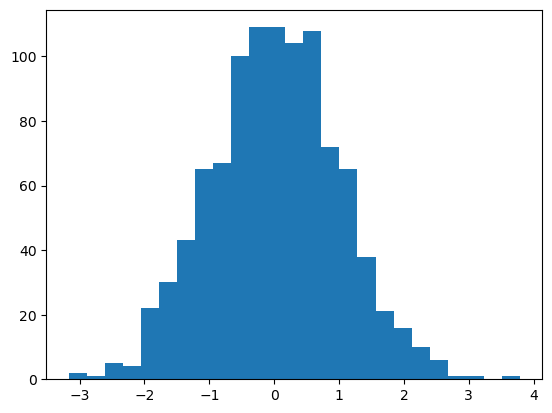

In [2]:
x = normal(0, 1)
xs = infer.sample(x, niter=1000)
plt.hist(xs, 25);

skipping MCMC...


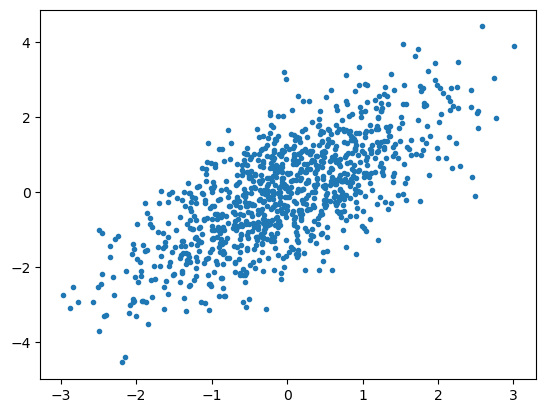

In [3]:
x = normal(0, 1)
y = normal(x, 1)
xs, ys = infer.sample((x, y), niter=1000)
plt.plot(xs, ys, '.');

skipping MCMC...


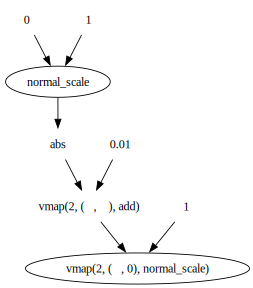

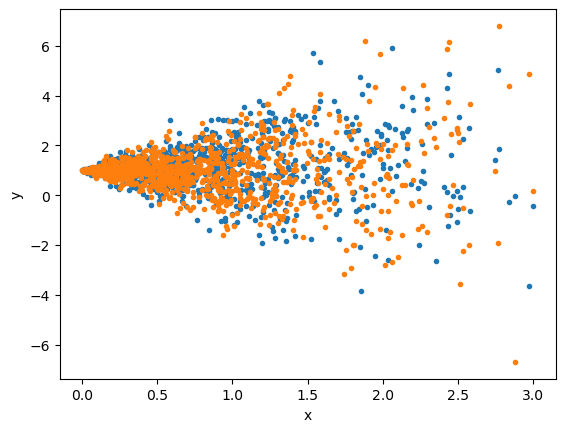

In [4]:
x = abs(normal(0, 1))
y = plate(N=2)(lambda:
               normal(1, .01 + x)
               )
xs, ys = infer.sample((x, y), niter=1000)
plt.plot(xs, ys, '.')
plt.xlabel('x')
plt.ylabel('y')

#print_upstream((x, y))
viz_upstream((x, y))

skipping MCMC...


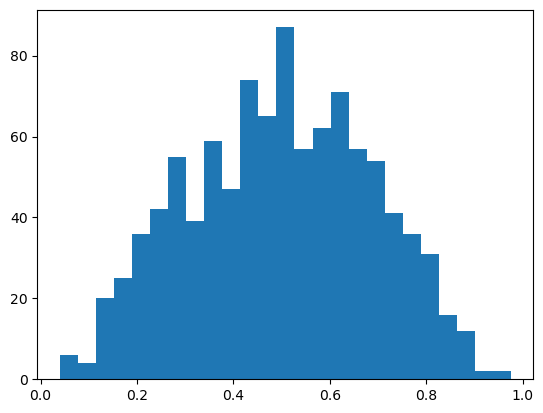

In [5]:
x = beta(3, 3)
xs = infer.sample(x, niter=1000)
plt.hist(xs, 25);

skipping MCMC...


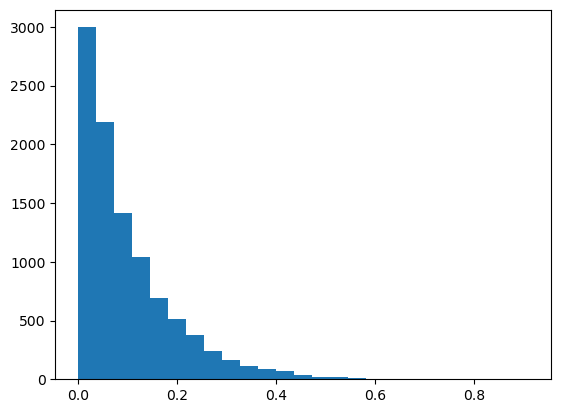

In [6]:
x = exponential(10.0)
xs = infer.sample(x, niter=10000)
plt.hist(xs, 25);

skipping MCMC...


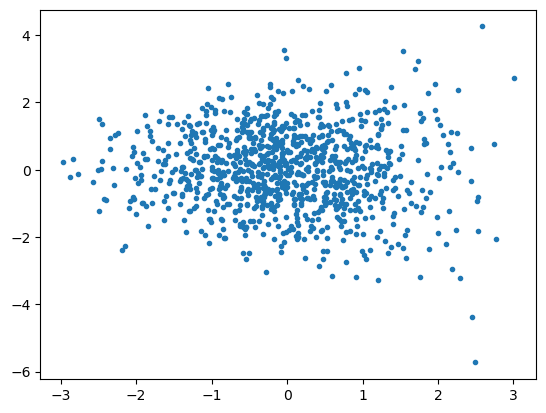

In [7]:
x = normal(0, 1)
y = normal(0, 1 + .1*exp(x))
xs, ys = infer.sample((x, y), niter=1000)
plt.plot(xs, ys, '.')

skipping MCMC...


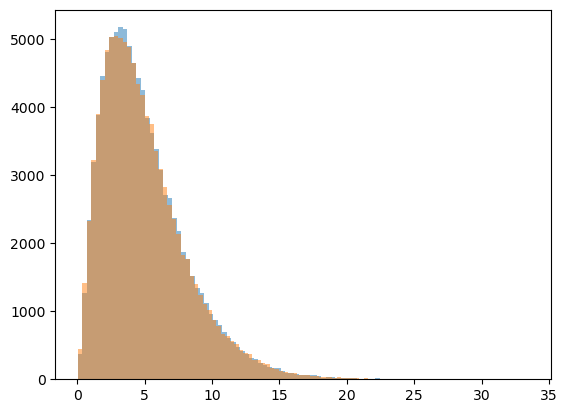

In [8]:
# indirect definition of chi-squared distribution
x = sum(plate(N=5)(lambda:
                   normal_scale(0,1)**2
                   ))
xs = infer.sample(x,niter=100000)
plt.hist(xs,100,alpha=0.5);

import numpyro.distributions as dists
key = jax.random.PRNGKey(0)
d =  dists.Chi2(5)
ys = d.sample(key, sample_shape=(100000,))
plt.hist(ys,100,alpha=0.5);


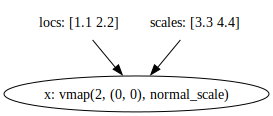

In [9]:
locs = makerv([1.1,2.2])
scales = makerv([3.3,4.4])
vec_normal = vmap(normal_scale,(0,0))
x = vec_normal(locs,scales)
viz_upstream([x],(),{x:'x',locs:'locs',scales:'scales'})

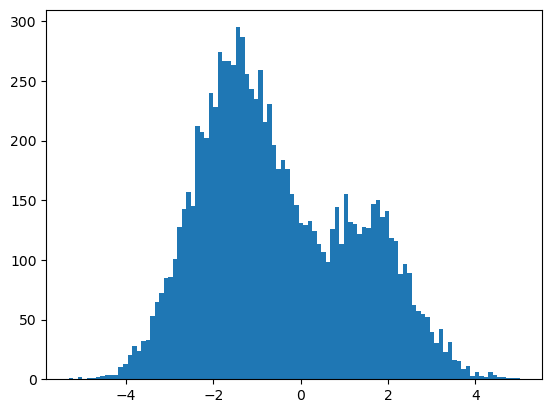

In [10]:
x = mix(bernoulli(0.33), lambda z: normal(-1.5+3*z,1))
y = normal(0*x,1)
xs, ys = infer.sample((x,y),[y],[0.0], niter=10000)
plt.hist(xs,100);

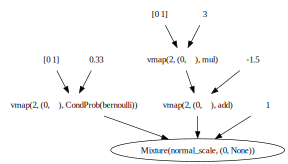

skipping MCMC...


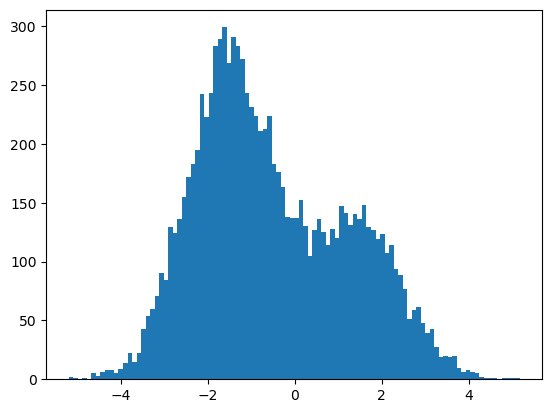

In [11]:
x = mix(bernoulli(0.33), lambda z: normal(-1.5+3*z,1))
display(viz_upstream(x))
xs = infer.sample(x,[],[], niter=10000)
plt.hist(xs,100);

skipping MCMC...


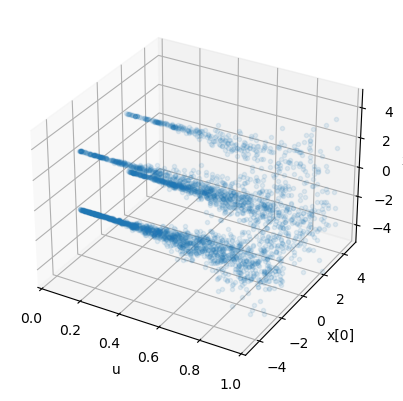

In [85]:
# do something interesting
u = uniform(0.00,1.00)
x = plate(N=2)(
    lambda: mix(bernoulli(0.33), lambda z: normal(-2+4*z, u**2)))
us, xs = infer.sample((u,x),niter=3000)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(us,xs[:,0],xs[:,1],'.',alpha=0.10)
ax.set_xlabel('u')
ax.set_ylabel('x[0]')
ax.set_zlabel('x[1]')
ax.set_xlim([0,1])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5]);